# Objetivo

O objetivo deste notebook é fazer um deep dive nos dados, para tal uma análise exploratória completamentar a realizada na manipulação dos dados será feita.

Os dados analisados serão os processados.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# 1 | Dataset offers

In [2]:
offers = pd.read_csv( "../data/processed/offers.csv")
offers = offers.drop(columns="Unnamed: 0")
offers.head()

,channels,min_value,duration,offer_id,offer_type,discount_value,social,mobile,email,web,bogo,discount,informational
0,"['email', 'mobile', 'social']",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0,1,0,0
1,"['web', 'email', 'mobile', 'social']",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1,1,0,0
2,"['web', 'email', 'mobile']",0,4,3f207df678b143eea3cee63160fa8bed,informational,0,0,1,1,1,0,0,1
3,"['web', 'email', 'mobile']",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,0,1,1,1,1,0,0
4,"['web', 'email']",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,0,0,1,1,0,1,0


In [3]:
# Quick stats
np.round(offers.describe(), 4)

,min_value,duration,discount_value,social,mobile,email,web,bogo,discount,informational
count,10.0000,10.0000,10.0000,10.0000,10.0000,10.0,10.0000,10.0000,10.0000,10.0000
mean,7.7000,6.5000,4.2000,0.6000,0.9000,1.0,0.8000,0.4000,0.4000,0.2000
std,5.8319,2.3214,3.5839,0.5164,0.3162,0.0,0.4216,0.5164,0.5164,0.4216
min,0.0000,3.0000,0.0000,0.0000,0.0000,1.0,0.0000,0.0000,0.0000,0.0000
25%,5.0000,5.0000,2.0000,0.0000,1.0000,1.0,1.0000,0.0000,0.0000,0.0000
50%,8.5000,7.0000,4.0000,1.0000,1.0000,1.0,1.0000,0.0000,0.0000,0.0000
75%,10.0000,7.0000,5.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,0.0000
max,20.0000,10.0000,10.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000


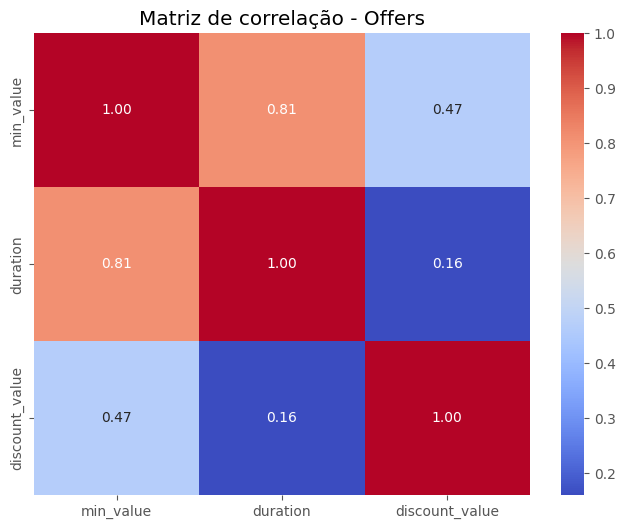

In [4]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    offers[["min_value", "duration", "discount_value"]].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
)
plt.title("Matriz de correlação - Offers")
plt.show()

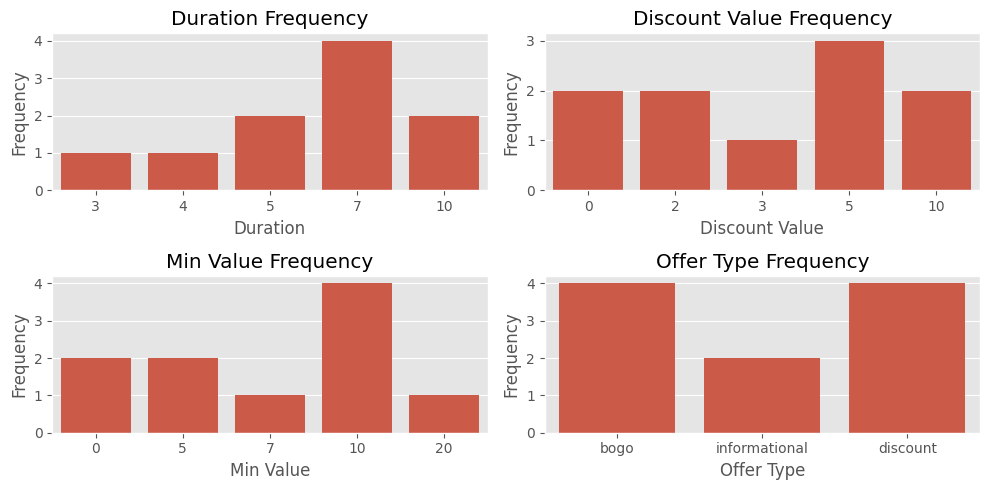

In [5]:
# Plot of frequencies
countplot_config = [
    ("duration", "Duration Frequency", "Duration", "Frequency"),
    ("discount_value", "Discount Value Frequency", "Discount Value", "Frequency"),
    ("min_value", "Min Value Frequency", "Min Value", "Frequency"),
    ("offer_type", "Offer Type Frequency", "Offer Type", "Frequency"),
]

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

for ax, (x, title, xlabel, ylabel) in zip(axes.flatten(), countplot_config):
    sns.countplot(x=x, data=offers, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

# Adjust layout
plt.tight_layout()
plt.show()

# 2 | Dataset customers

In [6]:
customers = pd.read_csv("../data/processed/customers.csv")
customers = customers.drop(columns="Unnamed: 0")
customers.head()

,age,registered_on,gender,customer_id,credit_card_limit,flag_info,days_as_customer
0,54.393524,2017-02-12,2,68be06ca386d4c31939f3a4f0e3dd783,65404.991568,0,2864
1,55.000000,2017-07-15,0,0610b486422d4921ae7d2bf64640c50b,112000.000000,1,2711
2,54.393524,2018-07-12,2,38fe809add3b4fcf9315a9694bb96ff5,65404.991568,0,2349
3,75.000000,2017-05-09,0,78afa995795e4d85b5d9ceeca43f5fef,100000.000000,1,2778
4,54.393524,2017-08-04,2,a03223e636434f42ac4c3df47e8bac43,65404.991568,0,2691


In [7]:
# Quick stats
np.round(customers.describe(), 4)

,age,gender,credit_card_limit,flag_info,days_as_customer
count,17000.0000,17000.0000,17000.0000,17000.0000,17000.0000
mean,54.3935,0.7799,65404.9916,0.8721,2852.4499
std,16.2335,0.6727,20169.2883,0.3340,411.2239
min,18.0000,0.0000,30000.0000,0.0000,2335.0000
25%,45.0000,0.0000,51000.0000,1.0000,2543.0000
50%,54.3935,1.0000,65404.9916,1.0000,2693.0000
75%,65.0000,1.0000,76000.0000,1.0000,3126.0000
max,101.0000,2.0000,120000.0000,1.0000,4158.0000


In [8]:
# Get means to plot
mean_age = customers["age"].mean()
mean_credit_limit = customers["credit_card_limit"].mean()

In [9]:
gender_mapping = {0: "F", 1: "M", 2: "O"}
customer_to_plot = customers.copy()
customer_to_plot["gender"] = customer_to_plot["gender"].map(gender_mapping)

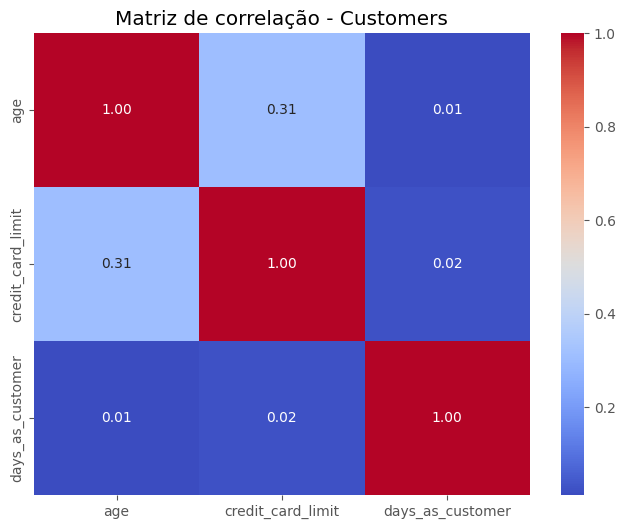

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    customer_to_plot[["age", "credit_card_limit", "days_as_customer"]].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
)
plt.title("Matriz de correlação - Customers")
plt.show()

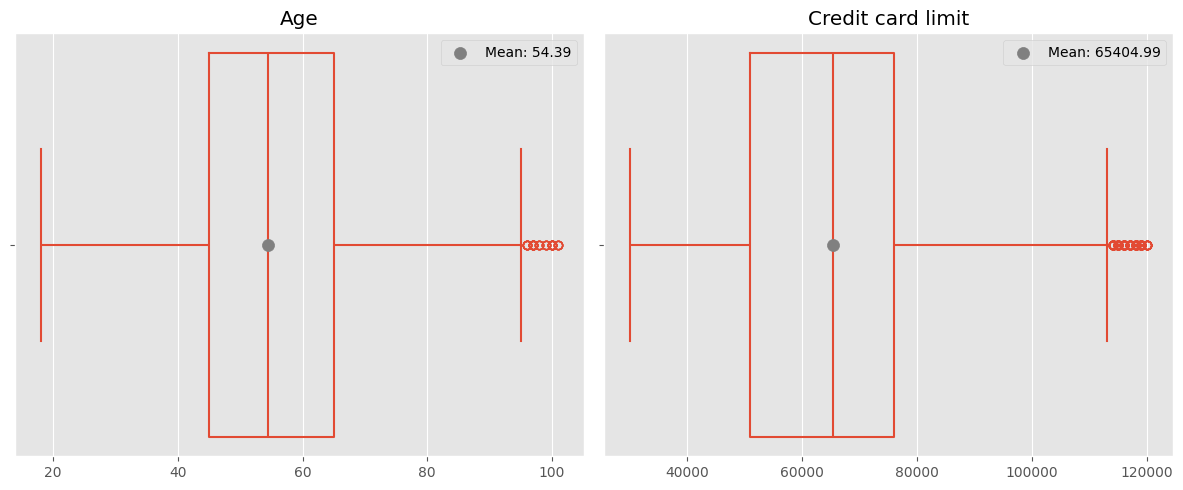

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(
    data=customer_to_plot,
    x="age",
    fill=False,
    gap=0.1,
    ax=axes[0],
)
axes[0].set_title("Age")
axes[0].set_xlabel("")
axes[0].scatter(
    mean_age, 0, color="grey", s=75, zorder=4, label=f"Mean: {mean_age:.2f}"
)
axes[0].legend()

sns.boxplot(
    data=customer_to_plot,
    x="credit_card_limit",
    fill=False,
    gap=0.1,
    ax=axes[1],
)
axes[1].set_title("Credit card limit")
axes[1].set_xlabel("")
axes[1].scatter(
    mean_credit_limit,
    0,
    color="grey",
    s=75,
    zorder=4,
    label=f"Mean: {mean_credit_limit:.2f}",
)
axes[1].legend()
# Adjust layout
plt.tight_layout()
plt.show()

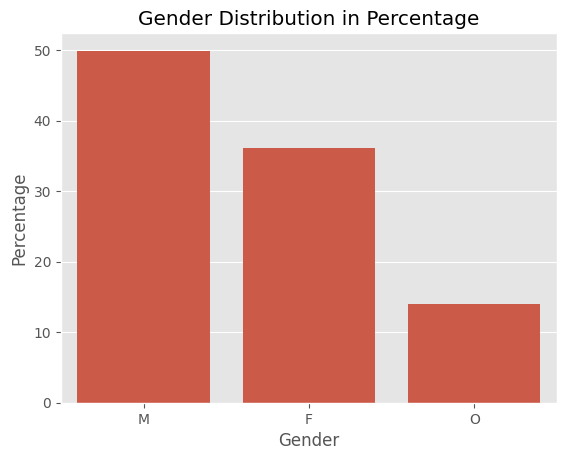

In [12]:
# Calculate percentages
gender_counts = customer_to_plot["gender"].value_counts(normalize=True) * 100
gender_percentages = gender_counts.reset_index()
gender_percentages.columns = ["gender", "percentage"]

# Plot percentages
sns.barplot(x="gender", y="percentage", data=gender_percentages)
plt.title("Gender Distribution in Percentage")
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

# 3 | Dataset transactions

In [13]:
transactions = pd.read_csv("../data/processed/transactions_processed.csv")
transactions = transactions.drop(columns="Unnamed: 0")
transactions.head()

,event,customer_id,time_since_test_start,amount,reward,offer_id,duration,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction,time_to_view,time_to_complete
0,offer received,0009655768c64bdeb2e877511632db8f,24.0,NaN,NaN,2906b810c7d4411798c6938adc9daaa5,7.0,0,1,0,0,NaN,NaN
1,offer completed,0009655768c64bdeb2e877511632db8f,24.0,NaN,2.0,2906b810c7d4411798c6938adc9daaa5,7.0,1,0,0,0,NaN,NaN
2,offer received,0009655768c64bdeb2e877511632db8f,14.0,NaN,NaN,3f207df678b143eea3cee63160fa8bed,4.0,0,1,0,0,1.5,NaN
3,offer viewed,0009655768c64bdeb2e877511632db8f,15.5,NaN,NaN,3f207df678b143eea3cee63160fa8bed,4.0,0,0,1,0,1.5,NaN
4,offer received,0009655768c64bdeb2e877511632db8f,7.0,NaN,NaN,5a8bc65990b245e5a138643cd4eb9837,3.0,0,1,0,0,1.0,NaN


In [14]:
# Quick stats
np.round(transactions.describe(), 4)

,time_since_test_start,amount,reward,duration,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction,time_to_view,time_to_complete
count,396939.0000,166499.0000,46152.0000,230440.0000,396939.0000,396939.0000,396939.0000,396939.0000,346402.0000,188208.0000
mean,15.3589,12.7807,4.9038,6.6068,0.1163,0.2644,0.1999,0.4195,1.2595,2.3603
std,8.3215,30.5334,2.8885,2.1325,0.3205,0.4410,0.3999,0.4935,2.1667,3.2512
min,0.0000,0.0500,2.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,8.0000,2.7700,2.0000,5.0000,0.0000,0.0000,0.0000,0.0000,0.2500,0.5000
50%,17.0000,8.7900,5.0000,7.0000,0.0000,0.0000,0.0000,0.0000,0.5000,1.5000
75%,22.2500,18.0400,5.0000,7.0000,0.0000,1.0000,0.0000,1.0000,1.5000,3.0000
max,29.7500,1062.2800,10.0000,10.0000,1.0000,1.0000,1.0000,1.0000,29.7500,29.2500


In [15]:
# Offer ID to integer mapping, to better visualization
offer_id_mapping = {
    offer_id: idx
    for idx, offer_id in enumerate(
        transactions["offer_id"].unique(), start=1
    )
}

transactions["offer_id"] = transactions["offer_id"].map(
    offer_id_mapping
)

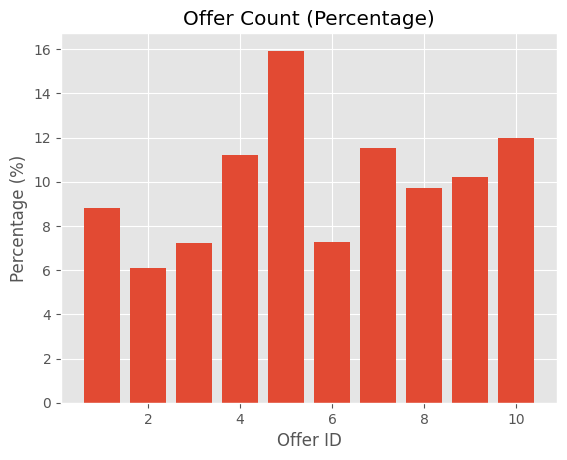

In [16]:
# Calculate percentages
transactions_percentage_df = transactions["offer_id"].value_counts(normalize=True) * 100
transactions_percentage_df.sort_index(inplace=True)

# Plot percent of offers
plt.bar(transactions_percentage_df.index, transactions_percentage_df.values)
plt.title("Offer Count (Percentage)")
plt.xlabel("Offer ID")
plt.ylabel("Percentage (%)")
plt.show()

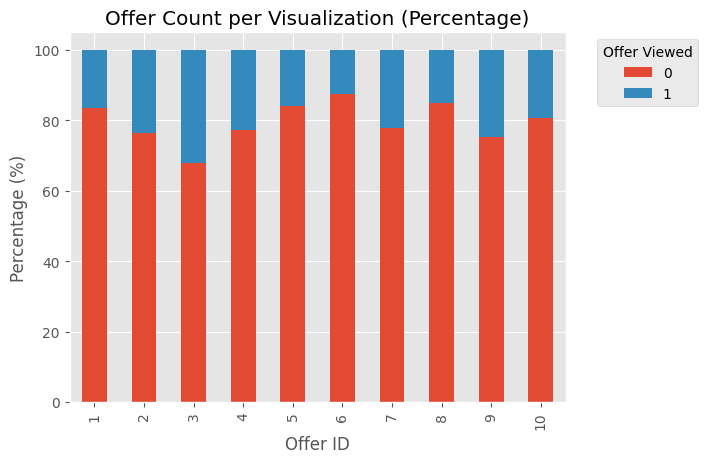

In [17]:
# Plot percent for combined_offer_id per event_offer_viewed
grouped_counts = (
    transactions.groupby(["offer_id", "event_offer_viewed"])
    .size()
    .unstack(fill_value=0)
)
grouped_counts_percentage = grouped_counts.div(grouped_counts.sum(axis=1), axis=0) * 100

grouped_counts_percentage.plot(kind="bar", stacked=True)
plt.title("Offer Count per Visualization (Percentage)")
plt.xlabel("Offer ID")
plt.ylabel("Percentage (%)")
plt.legend(title="Offer Viewed", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [18]:
# Top 3 ofertas mais visualizadas
offers[
    offers["offer_id"].isin(
        [
            "9b98b8c7a33c4b65b9aebfe6a799e6d9",
            "0b1e1539f2cc45b7b9fa7c272da2e1d7",
            "2906b810c7d4411798c6938adc9daaa5",
        ]
    )
]

,channels,min_value,duration,offer_id,offer_type,discount_value,social,mobile,email,web,bogo,discount,informational
3,"['web', 'email', 'mobile']",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,0,1,1,1,1,0,0
4,"['web', 'email']",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,0,0,1,1,0,1,0
9,"['web', 'email', 'mobile']",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,0,1,1,1,0,1,0


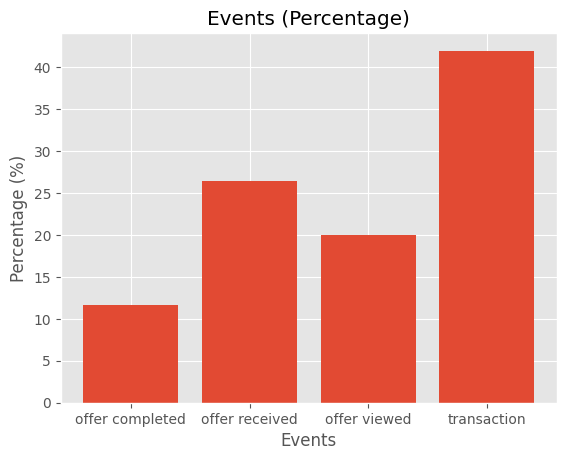

In [19]:
# Calculate percentages
transactions_event_percentage_df = transactions["event"].value_counts(normalize=True) * 100
transactions_event_percentage_df.sort_index(inplace=True)

# Plot percent of offers
plt.bar(transactions_event_percentage_df.index, transactions_event_percentage_df.values)
plt.title("Events (Percentage)")
plt.xlabel("Events")
plt.ylabel("Percentage (%)")
plt.show()

As ofertas mais visualizadas podem ser utilizadas para clientes em que não há dados, i.e., novos clientes. 

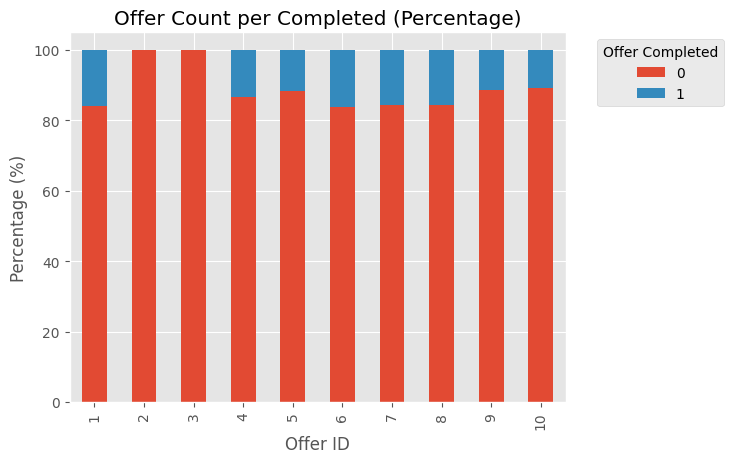

In [20]:
# Plot percent for offer_id e event_offer_completed
grouped_counts = (
    transactions.groupby(["offer_id", "event_offer_completed"])
    .size()
    .unstack(fill_value=0)
)
grouped_counts_percentage = grouped_counts.div(grouped_counts.sum(axis=1), axis=0) * 100

grouped_counts_percentage.plot(kind="bar", stacked=True)
plt.title("Offer Count per Completed (Percentage)")
plt.xlabel("Offer ID")
plt.ylabel("Percentage (%)")
plt.legend(title="Offer Completed", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

Ofertas 8 e 10 são ofertas informativas, logo elas não tem um reward que o cliente pode receber e por consequência não tem um evento de completar a oferta, apenas visualizá-las

In [21]:
# Offer 8 = '3f207df678b143eea3cee63160fa8bed'
# Offer 10 = '5a8bc65990b245e5a138643cd4eb9837'
offers[
    offers["offer_id"].isin(
        ["3f207df678b143eea3cee63160fa8bed", "5a8bc65990b245e5a138643cd4eb9837"]
    )
]

,channels,min_value,duration,offer_id,offer_type,discount_value,social,mobile,email,web,bogo,discount,informational
2,"['web', 'email', 'mobile']",0,4,3f207df678b143eea3cee63160fa8bed,informational,0,0,1,1,1,0,0,1
7,"['email', 'mobile', 'social']",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,1,1,1,0,0,0,1


# 4 | Dataset final

In [22]:
customer_offers_agg = pd.read_csv("../data/final/customer_offers_agg.csv")
customer_offers_agg.head()

,customer_id,offer_id,total_amount,total_reward,total_offer_completed,total_offer_received,total_offer_viewed,total_transaction,total_social,total_mobile,...,agv_time_to_view,avg_time_to_complete,credit_card_limit,days_as_customer,avg_amount,min_value,viewed_ratio,completed_ratio,gender,flag_info
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,0.00,2.0,1.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,72000.0,2796.0,NaN,10.0,0.0,0.0,1,1
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,0.00,0.0,0.0,1.0,1.0,0.0,0.0,2.0,...,1.5,0.0,72000.0,2796.0,NaN,0.0,1.0,0.0,1,1
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,22.16,0.0,0.0,1.0,1.0,1.0,3.0,3.0,...,1.0,0.0,72000.0,2796.0,22.160,0.0,1.0,0.0,1,1
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,8.57,5.0,1.0,1.0,1.0,1.0,4.0,4.0,...,2.0,0.0,72000.0,2796.0,8.570,5.0,1.0,1.0,1,1
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,96.87,2.0,1.0,1.0,1.0,6.0,9.0,9.0,...,1.5,0.0,72000.0,2796.0,16.145,10.0,1.0,1.0,1,1


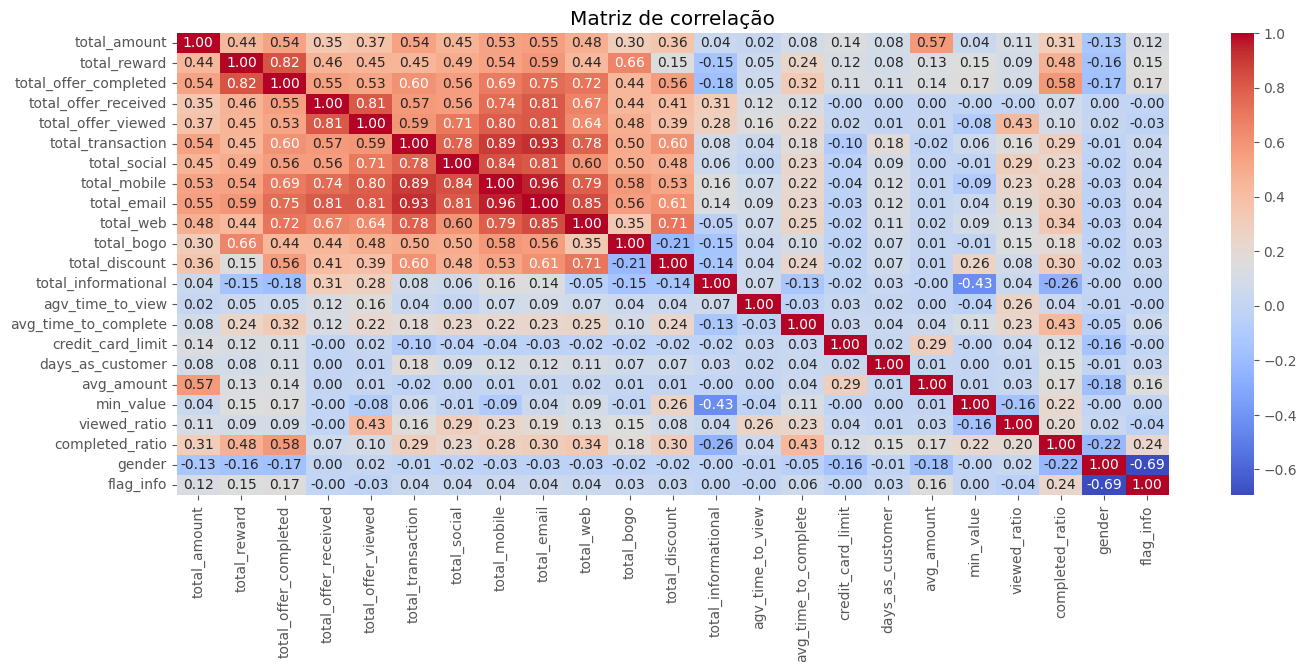

In [23]:
plt.figure(figsize=(16, 6))
sns.heatmap(
    customer_offers_agg.drop(columns=["customer_id", "offer_id"]).corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
)
plt.title("Matriz de correlação")
plt.show()

In [24]:
customer_offers_agg_to_plot = customer_offers_agg.copy()

In [25]:
# Offer ID to integer mapping, to better visualization
offer_id_mapping = {
    offer_id: idx
    for idx, offer_id in enumerate(
        customer_offers_agg_to_plot["offer_id"].unique(), start=1
    )
}

customer_offers_agg_to_plot["offer_id_mapping"] = customer_offers_agg_to_plot[
    "offer_id"
].map(offer_id_mapping)

Taxa de visualização e finalização por oferta para os clientes:

In [26]:
offer_ratio = (
    customer_offers_agg_to_plot[
        ["viewed_ratio", "completed_ratio", "offer_id", "offer_id_mapping"]
    ]
    .groupby(by=["offer_id"])
    .mean()
    .reset_index()
    .sort_values(by=["viewed_ratio"], ascending=False)
)
offer_ratio

,offer_id,viewed_ratio,completed_ratio,offer_id_mapping
9,fafdcd668e3743c1bb461111dcafc2a4,0.964756,0.699792,5.0
4,4d5c57ea9a6940dd891ad53e9dbe8da0,0.961506,0.441672,9.0
1,2298d6c36e964ae4a3e7e9706d1fb8c2,0.960171,0.679481,7.0
8,f19421c1d4aa40978ebb69ca19b0e20d,0.959944,0.573650,4.0
5,5a8bc65990b245e5a138643cd4eb9837,0.879035,0.000000,3.0
7,ae264e3637204a6fb9bb56bc8210ddfd,0.876608,0.469956,10.0
3,3f207df678b143eea3cee63160fa8bed,0.543911,0.000000,2.0
6,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.542434,0.536266,8.0
2,2906b810c7d4411798c6938adc9daaa5,0.540255,0.542728,1.0
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.350413,0.414363,6.0


In [27]:
offer_ratio.to_csv("../data/final/historical_rate.csv")

Realizando a análise de acordo com os clientes que há informação e que não há (clientes que tem idade igual a 118 anos)

In [28]:
grouped_view_completed = (
    customer_offers_agg_to_plot.groupby(["offer_id", "flag_info"])[
        ["viewed_ratio", "completed_ratio"]
    ]
    .mean()
    .reset_index()
)
grouped_view_completed.head()

,offer_id,flag_info,viewed_ratio,completed_ratio
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0.478159,0.043902
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0.332445,0.457809
2,2298d6c36e964ae4a3e7e9706d1fb8c2,0,0.967196,0.285625
3,2298d6c36e964ae4a3e7e9706d1fb8c2,1,0.959128,0.737508
4,2906b810c7d4411798c6938adc9daaa5,0,0.653002,0.126608


In [29]:
grouped_view_completed_winfo = grouped_view_completed[
    grouped_view_completed["flag_info"] == 1
]
grouped_view_completed_noinfo = grouped_view_completed[
    grouped_view_completed["flag_info"] == 0
]

In [30]:
grouped_view_completed_winfo.sort_values(by="viewed_ratio", ascending=False)

,offer_id,flag_info,viewed_ratio,completed_ratio
19,fafdcd668e3743c1bb461111dcafc2a4,1,0.963354,0.751508
9,4d5c57ea9a6940dd891ad53e9dbe8da0,1,0.960292,0.503864
17,f19421c1d4aa40978ebb69ca19b0e20d,1,0.960208,0.629488
3,2298d6c36e964ae4a3e7e9706d1fb8c2,1,0.959128,0.737508
11,5a8bc65990b245e5a138643cd4eb9837,1,0.885566,0.000000
15,ae264e3637204a6fb9bb56bc8210ddfd,1,0.882129,0.526803
5,2906b810c7d4411798c6938adc9daaa5,1,0.523692,0.600536
13,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0.523578,0.589525
7,3f207df678b143eea3cee63160fa8bed,1,0.522206,0.000000
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0.332445,0.457809


In [31]:
grouped_view_completed_noinfo.sort_values(by="viewed_ratio", ascending=False)

,offer_id,flag_info,viewed_ratio,completed_ratio
18,fafdcd668e3743c1bb461111dcafc2a4,0,0.974619,0.335180
8,4d5c57ea9a6940dd891ad53e9dbe8da0,0,0.969678,0.022500
2,2298d6c36e964ae4a3e7e9706d1fb8c2,0,0.967196,0.285625
16,f19421c1d4aa40978ebb69ca19b0e20d,0,0.958180,0.196721
14,ae264e3637204a6fb9bb56bc8210ddfd,0,0.838683,0.037803
10,5a8bc65990b245e5a138643cd4eb9837,0,0.834164,0.000000
6,3f207df678b143eea3cee63160fa8bed,0,0.692482,0.000000
12,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0.670972,0.163970
4,2906b810c7d4411798c6938adc9daaa5,0,0.653002,0.126608
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0.478159,0.043902


Observa-se que as ofertas quatro ofertas mais visualizadas se mantém (ofertas 5, 9, 4 e 7), independente se há informações acerca dos clientes ou não. 

Os clientes que não tem informações de ```gender``` e ```credit_card_limit``` e ```age``` igual a 118 anos recebem e utilizam as ofertas disponibilizadas. Comparando os valores de ```total_amount``` e ```total_reward``` entre esses clientes:

In [38]:
grouped_amount_reward = (
    customer_offers_agg_to_plot.groupby(["offer_id", "flag_info", "offer_id_mapping"])[
        ["total_amount", "total_reward"]
    ]
    .mean()
    .reset_index()
)

In [39]:
grouped_winfo = grouped_amount_reward[
    grouped_amount_reward["flag_info"] == 1
]
grouped_noinfo = grouped_amount_reward[
    grouped_amount_reward["flag_info"] == 0
]

In [40]:
grouped_winfo

,offer_id,flag_info,offer_id_mapping,total_amount,total_reward
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,6,24.496369,4.127595
3,2298d6c36e964ae4a3e7e9706d1fb8c2,1,7,39.399813,3.667877
5,2906b810c7d4411798c6938adc9daaa5,1,1,30.884896,1.974453
7,3f207df678b143eea3cee63160fa8bed,1,2,19.109187,0.000000
9,4d5c57ea9a6940dd891ad53e9dbe8da0,1,9,35.645974,8.250771
11,5a8bc65990b245e5a138643cd4eb9837,1,3,19.512210,0.000000
13,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,8,37.311310,5.205702
15,ae264e3637204a6fb9bb56bc8210ddfd,1,10,48.084249,9.069015
17,f19421c1d4aa40978ebb69ca19b0e20d,1,4,41.445392,5.171717
19,fafdcd668e3743c1bb461111dcafc2a4,1,5,80.614529,2.465368


In [41]:
grouped_noinfo

,offer_id,flag_info,offer_id_mapping,total_amount,total_reward
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,6,3.531399,0.292621
2,2298d6c36e964ae4a3e7e9706d1fb8c2,0,7,6.173068,1.327628
4,2906b810c7d4411798c6938adc9daaa5,0,1,4.852298,0.407453
6,3f207df678b143eea3cee63160fa8bed,0,2,3.493829,0.000000
8,4d5c57ea9a6940dd891ad53e9dbe8da0,0,9,4.980574,0.329670
10,5a8bc65990b245e5a138643cd4eb9837,0,3,3.369689,0.000000
12,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,8,5.722005,1.328413
14,ae264e3637204a6fb9bb56bc8210ddfd,0,10,6.962988,0.481481
16,f19421c1d4aa40978ebb69ca19b0e20d,0,4,7.024162,1.670747
18,fafdcd668e3743c1bb461111dcafc2a4,0,5,13.869721,1.116751


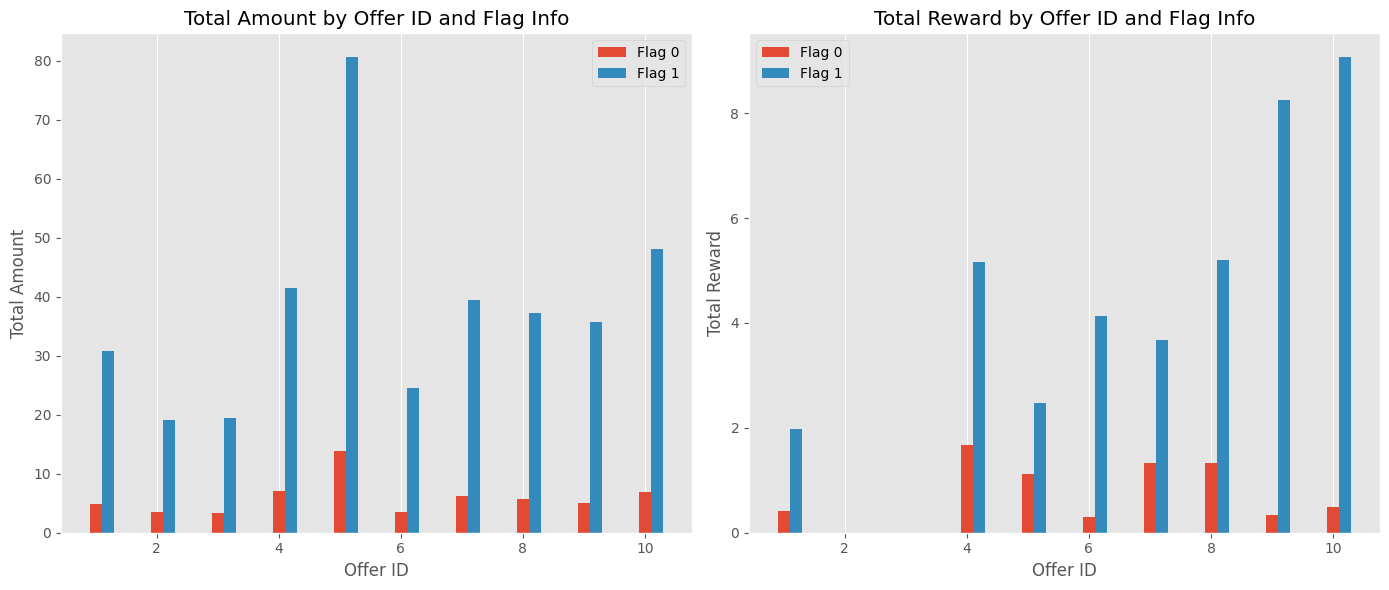

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Plot 1: Total Amount
for flag in grouped_amount_reward["flag_info"].unique():
    subset = grouped_amount_reward[grouped_amount_reward["flag_info"] == flag]
    axes[0].bar(
        subset["offer_id_mapping"] + (flag * 0.2),
        subset["total_amount"],
        width=0.2,
        label=f"Flag {flag}",
    )

axes[0].set_title("Total Amount by Offer ID and Flag Info")
axes[0].set_xlabel("Offer ID")
axes[0].set_ylabel("Total Amount")
axes[0].legend()
axes[0].grid(axis="y")

# Plot 2: Total Reward
for flag in grouped_amount_reward["flag_info"].unique():
    subset = grouped_amount_reward[grouped_amount_reward["flag_info"] == flag]
    axes[1].bar(
        subset["offer_id_mapping"] + (flag * 0.2),
        subset["total_reward"],
        width=0.2,
        label=f"Flag {flag}",
    )

axes[1].set_title("Total Reward by Offer ID and Flag Info")
axes[1].set_xlabel("Offer ID")
axes[1].set_ylabel("Total Reward")
axes[1].legend()
axes[1].grid(axis="y")

# Adjust layout and show plot
plt.tight_layout()
plt.show()